In [2]:
import numpy as np
import pandas as pd

# Machine learning
import sklearn as skl


# Graphics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

trn = pd.read_csv('Data/train.csv')
tst = pd.read_csv('Data/test.csv')
n_trn = len(trn)
df = pd.concat([trn, tst])
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


PassengerId and Ticket are highly unlikely to be relevant, so delete them. Also delete Cabin because most values are mising. Additionally, recode Sex as 'm'/'f'.

In [3]:
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.Sex.replace(['male', 'female'], ['m', 'f'], inplace=True)
df.Survived.replace([1, 0], [True, False], inplace=True)
df.head()

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,3,m,1,0.0
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,f,1,1.0
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,f,0,1.0
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,f,1,1.0
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,3,m,0,0.0


Imputation. First, see how many values are missing in each column.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age         1046 non-null float64
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(3), int64(3), object(3)
memory usage: 102.3+ KB


Embarked and Fare are missing very few values. Simply fill these with the appropriate mode and relevant median, respectively, after inspection.

In [5]:
# Display table with counts for each value of Embarked
print(df['Embarked'].value_counts())
# Value 'S' is by far the most common, so set the missing values to S.
df['Embarked'].fillna('S', inplace=True)


S    914
C    270
Q    123
Name: Embarked, dtype: int64


In [6]:
# Get row of passenger with fare information missing
df[df['Fare'].isnull()]

,Age,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived
152,60.5,S,NaN,"Storey, Mr. Thomas",0,3,m,0,NaN


In [7]:
# Get median fare paid by passengers in the same class, from the same destination and place it.
median_fare = df[np.logical_and(df['Pclass']==3, df['Embarked']=='S')]['Fare'].median()
median_fare = df[np.logical_and(df['Pclass']==3, df['Embarked']=='S')]['Fare'].median()
df['Fare'].fillna('S', inplace=True)
# Check only Survived (naturally only has values for training set) and Age (to be done later, if at all) have missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 9 columns):
Age         1046 non-null float64
Embarked    1309 non-null object
Fare        1309 non-null object
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(2), int64(3), object(4)
memory usage: 102.3+ KB


Make some plots to gain intuition about suitable models

In [8]:
# Embarked would likely only be relevant in so far as it is an indicator of socioeconomic class. But since we now have complete
# information for Fare as well as Pclass, we can discard it.
df.drop(['Embarked'], axis=1, inplace=True)

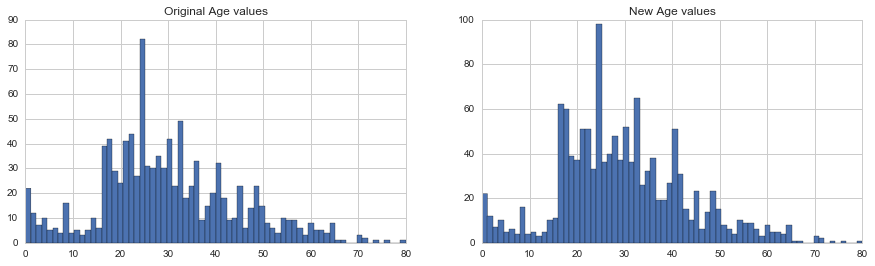

In [9]:
# Fill in missing age values by sampling randomly from the existing values.

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values')
axis2.set_title('New Age values')

# get average, std, and number of NaN values in df
average_age   = df["Age"].mean()
std_age      = df["Age"].std()
count_nan_age = df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age - std_age, average_age + std_age, size = count_nan_age)

# plot original Age values
# NOTE: drop all null values, and convert to int
df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
df.loc[np.isnan(df["Age"]), "Age"] = rand_1

# convert from float to int
df['Age'] = df['Age'].astype(int)
        
# plot new Age Values
df['Age'].hist(bins=70, ax=axis2)

In [10]:
# Check all missing values have been taken care of
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
Age         1309 non-null int32
Fare        1309 non-null object
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    891 non-null float64
dtypes: float64(1), int32(1), int64(3), object(3)
memory usage: 86.9+ KB


## Some exploratory plots

Would be better to have sample sizes for each plot.


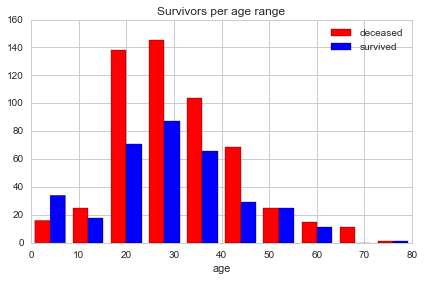

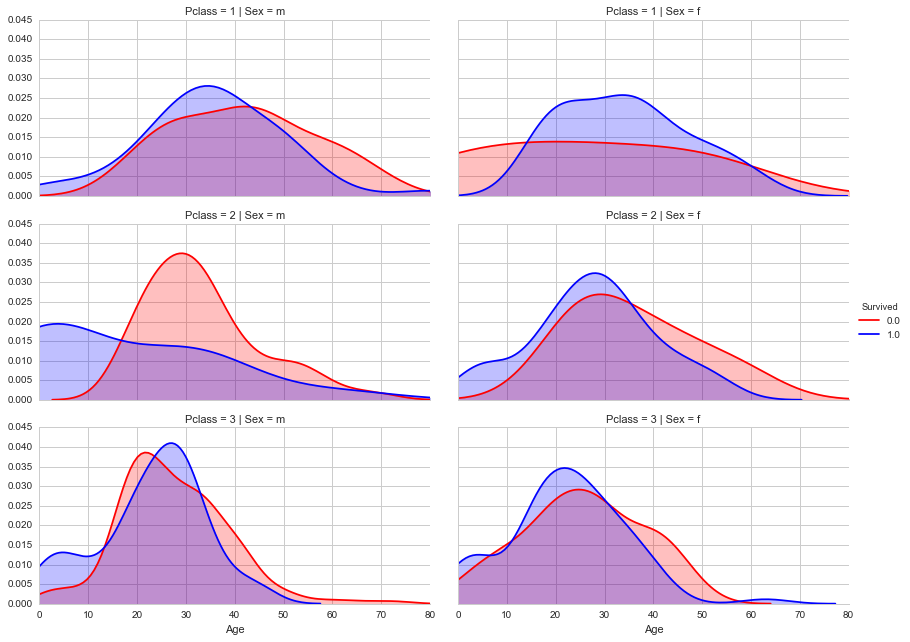

In [62]:
df_trn = df[:n_trn]

n_bins = 10
x1 = np.array(df_trn['Age'][np.logical_and(df_trn['Survived']==0, -np.isnan(df_trn['Age']))])
x2 = np.array(df_trn['Age'][np.logical_and(df_trn['Survived']==1, -np.isnan(df_trn['Age']))])
x=[x1,x2]

# fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,5))
plt.figure()

colors = ['red', 'blue']
plt.hist(x, n_bins, normed=0, histtype='bar', color=colors, label=['deceased', 'survived'])
plt.legend(prop={'size': 10})
plt.title('Survivors per age range')
plt.xlabel('age')
plt.tight_layout()

# Seaborn Facets
# plt.figure(figsize=(5,3))

# peaks for survived/not survived passengers by their age


facet = sns.FacetGrid(df_trn, row='Pclass', col='Sex', hue="Survived", aspect=2, palette=['red','blue'])
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_trn['Age'].max()))
facet.add_legend()

print('Would be better to have sample sizes for each plot in titles.')

facet_grid_n = pd.df()



## First predictive models

Based on these plots, a model using only Sex, Age and Pclass should be able to have some predictive power for survival.
First: a simple decision tree.

In [ ]:
# Fit a tree
m_tree = skl.tree.DecisionTreeClassifier()

In [1]:
a=sns.FacetGrid

Object `sns.FacetGrid` not found.
